# 实验一：单变量线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## 画直径X和价格Y的散点图

In [2]:
def initPlot():
    plt.figure()          
    plt.title('180512206-李环宇-Pizza Price vs Diameter')  
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文
    plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
    plt.xlabel('Diameter')  
    plt.ylabel('Price')   
    plt.axis([0, 25, 0, 25])        
    plt.grid(True)
    return plt

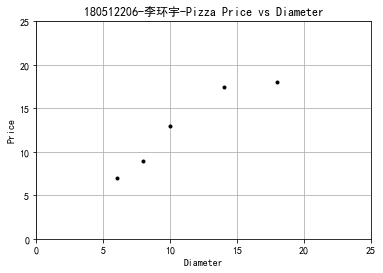

In [4]:
plt = initPlot()    
plt.plot(x_train, y_train, 'k.')         #k是黑色，.是以点作为图上显示
plt.savefig('output/实验1.1.png',dpi=80)

In [104]:
plt.show()

1.价格𝑦随着直径𝑥的变化，大致呈现线性变化；
2.如果根据现有的训练数据能够拟合出一条直线，使之与这些训练数据的各点都比较接近，那么根据该直线，就可以计算出在任意直径披萨的价格。

## 训练模型

### 准备训练数据

In [3]:
x_train = np.array([6,8,10,14,18])[:,np.newaxis]
y_train = np.array([7,9,13,17.5,18])

### 构建线性模型

In [5]:
lmodel = LinearRegression()

### 求线性方程的截距和斜率

In [6]:
# 根据训练数据拟合出直线,以得到假设函数
hypothesis = lmodel.fit(x_train, y_train)

In [7]:
print("截距=", hypothesis.intercept_)  
print("斜率=", hypothesis.coef_)        

截距= 1.965517241379315
斜率= [0.9762931]


### 画拟合直线

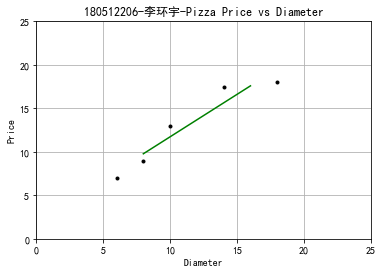

In [13]:
plt = initPlot()
plt.plot(x_train, y_train, 'k.')
plt.plot(x_predictDiam, y_predictPrim, 'g-')
plt.savefig('output/实验1.2.png',dpi=80)

## 模型预测

### 预测测12英寸披萨的价格

In [9]:
predictPrice = lmodel.predict([[12]])

In [10]:
print('twelve inch pizza price %f' % predictPrice)

twelve inch pizza price 13.681034


### 批量预测多个直径

In [11]:
x_predictDiam = np.array([8,9,11,12,16])[:,np.newaxis]
y_predictPrim = lmodel.predict(x_predictDiam)

In [12]:
x_predictDiam

array([[ 8],
       [ 9],
       [11],
       [12],
       [16]])

In [72]:
y_predictPrim

array([ 9.77586207, 10.75215517, 12.70474138, 13.68103448, 17.5862069 ])

## 评价分析模型

### 准备测试数据

In [14]:
x_test = np.array([8,9,11,12,16])[:,np.newaxis]
y_test = np.array([8.5,11,12,15,18])

In [15]:
hpyTrain = lmodel.predict(x_train)
hpyTest = lmodel.predict(x_test)

###  手动计算训练数据集残差

In [16]:
ssResTrain = sum((hpyTrain - y_train)**2)                

In [17]:
ssResTrain

8.747844827586203

### Python计算的训练数据集残差

In [18]:
lmodel._residues

8.747844827586201

### 手动计算测试数据集残差

In [19]:
ssResTest = sum((hpyTest - y_test)**2)

### 手动计算测试数据集y值偏差平方和

In [20]:
ssTotTest = sum((y_test - np.mean(y_test))**2)

### 手动计算R方

In [21]:
Rsquare = 1 - ssResTest / ssTotTest

In [22]:
Rsquare

0.9244131686820731

### Python计算的训练数据集的R方

In [23]:
lmodel.score(x_test, y_test)

0.9244131686820731

### corrcoef函数计算各行元素之间相关性

In [24]:
print(np.corrcoef(x_train.T, y_train.T))            # 计算训练数据的相关性

[[1.         0.95394004]
 [0.95394004 1.        ]]


In [93]:
print(np.corrcoef(x_test.T, y_test.T))              # 计算测试数据的相关性

[[1.        0.9725666]
 [0.9725666 1.       ]]


### 画图

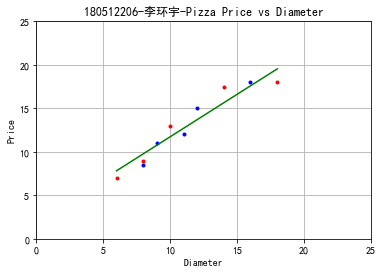

In [25]:
plt = initPlot()
plt.plot(x_train, y_train, 'r.')          # 训练点数据(红色)
plt.plot(x_test, y_test, 'b.')            # 测试点数据(蓝色)
plt.plot(x_train, hpyTrain, 'g-')        # 假设函数直线(绿色)
plt.savefig('output/实验1.3.png',dpi=80)
plt.show()

### 模型准确率

In [26]:
print('model score = ', lmodel.score(x_test, y_test))

model score =  0.9244131686820731
